In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sklearn 
import pandas as pd
from sklearn.datasets import load_digits

# KNN on MNIST Dataset 

In [36]:
dataset = pd.read_csv("C:/Users/vikas/Desktop/mnist-in-csv/mnist_train.csv") # give the address of mnist dataset where it is present in
                                                                             # your computer/laptop
print(dataset.shape)

(60000, 785)


In [37]:
dataset.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [38]:
dataset.head() # By default it shpw first five values

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
dataset = dataset.values[:]
dataset.shape

(60000, 785)

# Spliting the labels and the points

In [40]:
x_train = dataset[:,1:]
y_train = dataset[:,0]
print(x_train.shape , y_train.shape)

(60000, 784) (60000,)


# Implementing KNN

In [41]:
def euclidean(a1, a2):                    # we are using euclidean distance in KNN you can use any other 
    return np.sqrt(np.sum((a1 - a2) ** 2))

In [42]:
def KNN(x_train , y_train ,test_point, k=5):
    distances = []
    
    # 1) Compute distances using euclidean
    for test,label in zip(x_train,y_train):
        dist = euclidean(test_point , test)
        distances.append((dist , label))
        
    # 2) Sort distances on the basis of its distance
    distances = sorted(distances, key=lambda x: x[0])
    
    #3) Choose n nearest neighbours.By default value of k is equal to 5
    k_nearest = np.array(distances[:k])
    freq = np.unique(k_nearest[: , 1] , return_counts=True)
    labels , count = freq
    
    # 4) Decide (Majority Voting)
    verdict = labels[count.argmax()]
    return verdict

In [43]:
from sklearn.neighbors import KNeighborsClassifier

# K-Means For Image Segmentation

In [44]:
from sklearn.cluster import KMeans

In [45]:
k_means_classifier = KMeans(n_clusters=2)

In [46]:
def segmentImage(image , k=2):
        # reshape the image for KMeans
        image = image.reshape((-1,3))
        
        # fit the image
        k_means_classifier.fit(image)
        
        # again resize the image
        image = image.reshape((28,28,3))
        
        centres = np.array(k_means_classifier.cluster_centers_ ) # getting centres of the clusters
        labels = k_means_classifier.labels_ # get labels of the clusters
        
        # reshaping the labels to appropriate size
        lables = labels.reshape((28,28))
        
        # get the colors present in the image(Color Extraction)
        colors = np.unique(labels,return_counts=True)
        
        #get the required color from the image 
        req_color = centres[colors[0][np.argmin(colors[1])]]
        a = colors[0][np.argmin(colors[1])]
        
        new_img = np.zeros(image.shape) # create new image and initialize its values from 0
        gray = np.zeros((1,784))
        
        # assign the values of color to the new image 
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                if labels[28*i+j]==a:
                    new_img[i][j][0] = 255
                    new_img[i][j][1] = 255
                    new_img[i][j][2] = 255
                    gray[0][28*i+j] = 255
        np.reshape(gray,(-1,784))
        
         # get predctions using KNN
        pred = KNN(x_train , y_train ,gray , 37)
        return pred # return the predicted label of the digit shown

# Testing 

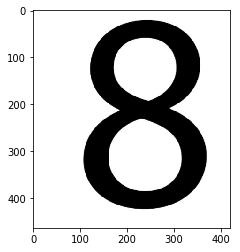

(464, 420, 3)


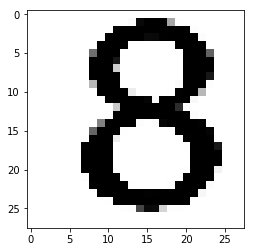

(28, 28, 3)
Prediction of Testing Image is :- 8.0


In [47]:
# Read Testing Image
image = cv2.imread("IMG_20191016_163241.jpg")
plt.imshow(image) # show image using matplotlib
plt.show()
print(image.shape) # testing image size
image  = cv2.resize(image , (28,28)) # resizing image of suitable size
plt.imshow(image) #resized image
plt.show()
print(image.shape) # size of resized image

pred = segmentImage(image)
print("Prediction of Testing Image is :-",pred)

# Capturing Live Frames Using OpenCV

In [48]:
cap = cv2.VideoCapture(0)  # capturing frames using cv2

In [49]:
while True:
    ret , frame = cap.read()
    if ret == False:
        continue
    
    image  = cv2.resize(frame , (28,28))
    label = segmentImage(image)
    label = str(label)
    label_s = "The Predicted Digit is:-"+label
#     print(label)
    cv2.putText(frame, label_s,(35,35), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2,cv2.LINE_AA) 
    cv2.imshow("Output",frame)
    
    key = cv2.waitKey(1) & 0xFF
    if key==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()